### Bound-free Gaunt factor calculated following Karzas and Latter 1961.

The bound free Gaunt factor is defined as

$$ g_{bf} = \frac{\sigma_{bf}}{\sigma_{bf}^{K}} $$

where 

$\sigma_{bf} $ is the quantum-mechanical bound-free cross-section

$ \sigma_{bf}^{K} $ is the semi-classical Kramer's cross-section

For reference, see equation 40 of Karzas and Latter 1961.


In [1]:
%reset
import math 
import numpy as np 
import matplotlib.pyplot as plt 

# Constants in CGS units: http://www.astro.wisc.edu/~dolan/constants.html
R = 2.1798741e-11 # Rydber's constant [erg]
c = 2.99792458e10 # speed of light [cm s-1.]
e_charge = 4.8032068e-10 # electron charge [esu]
e_mass = 9.1093897e-28 # electron mass [g]
h = 6.6260755e-27 # planck's constant [erg s]

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# General function for the gaunt factor
def total_sigma_bf(v,Z,l,n):
    E = v*h
    if E < (Z**2 * R / n**2):
        return 0.
    sigma_sum = sigma_bf_below(n, l, v, Z) + sigma_bf_above(n, l, v, Z)

    return sigma_sum

def get_gaunt_factor_bf(v, Z, n, E):
    sigma_bf = a_n(v,Z,n)
    sigma_k = get_kramer_sigma(n, E, Z)
    
    return sigma_bf/sigma_k

# Kramer's cross section (39)
def get_kramer_sigma(n, E, Z): 
    
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n

    kramer_sigma = 2.**4./(3*math.sqrt(3.))*e_charge**2./(e_mass*c*v) *1./n *(rho**2/(1+rho**2))**2. 
    return kramer_sigma

# Quantum cross section going to l-1 (36)
def sigma_bf_below(n, l, v, Z): 
    
    E = v*h
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n

    p1 = math.pi*e_charge**2/(e_mass*c*v)
    p2 = 2.**(4*l)/3.
    
    p3 = l**2 * math.factorial(n+l)
    
    l = int(l)
    
    # make sure we're counting for the extreme cases, when l = 0 or 1
    if l == 0: 
        return 0
    elif l ==1: 
        p3 = 1
    else:
        for i in range(1, l): 
            p3 *= (i**2 + eta**2)
    
    # the factorial of a negative number does not exist
    if n-l-1<0: 
        return 0
    else:
        p4 = math.factorial(2*l+1) *math.factorial(2*l-1) * math.factorial(n-l-1)
    
    p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta))

    p6 = rho**(2*l+2)/(1+rho**2)**(2*n-2)
    
    p7 = (G_l(l,-(l+1-n),eta,rho)-(1+rho**2)**(-2)*G_l(l,-(l-1-n),eta,rho))**2 
    
    all_together = p1*p2*p3/p4*p5*p6*p7
    
    return all_together

# Quantum cross section going to l+1 (37)
def sigma_bf_above(n, l, v, Z): 
    E = v*h
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n
    
    p1 = math.pi*e_charge**2/(e_mass*c*v)
    
    p2 = 2.**(4*l+6)/3.
    

    p3= (l+1)**2 * math.factorial(n+l)

    l = int(l)
    n = int(n)
    
    for i in range(1,l+2): 
        
        p3 *= (i**2+eta**2)
    
    if n-l-1<0: 
        return 0
    else:
        p4 = (2*l+1)*math.factorial(2*l+1)*math.factorial(2*l+2)*math.factorial(n-l-1)*((l+1)**2+eta**2)**2
    
    p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta))
    
    p6 = rho**(2*l+4)*eta**2/(1+rho**2)**(2*n)
    
    p7 = ((l+1-n)*G_l(l+1,-(l+1-n),eta,rho)+(l+1+n)/(1+rho**2)*G_l(l+1,-(l-n),eta,rho))**2 
    
    all_together = p1*p2*p3/p4*p5*p6*p7
    
    return all_together

# Bound free matrix element Gl (appendix C)
def G_l(l, m, eta, rho): 
    
    m = int(m)
    gl = 0
    for s in range(0,2*m+1): 
        gl += b_const(s, l, m, eta, rho)*rho**s
    return gl 

# constant for the Gl free matrix element (Appendix c, eqn c8)
def b_const(s, l, m, eta, rho):
    
    if s==0:
        return 1
    elif s==1: 
        return 2*m*eta/l
    else:
        p1 = (4*eta*(s-1-m))*b_const(s-1, l, m, eta, rho)
        p2 = (2*m+2-s)*(2*m+2*l+1-s)*b_const(s-2, l, m,  eta, rho)
        return -1./(s*(s+2*l-1))*(p1+p2)

## Bound Free emissivity formulas

In [5]:
import numpy as np 

def a_n(v,Z,n): #Matthew and Brown 1970
    E = h*v
    sigma_weighted = 0
    if E < (Z**2 * R / n**2):
        return 0.
    else:
        for l_index in range(int(n)):
            sigma_weighted += ((2*l_index) + 1)* total_sigma_bf(v,Z,l_index,n) 
    return sigma_weighted / (n**2)

def gamma_fb(v,Z, n, T): #equation 4.23 of Osterbrock
    #v is the frequency
    an = a_n(v, Z, n)
    part1 = (2/np.pi)**(0.5)*np.exp(((Z**2)*R)/n**2)/((c**2)*((e_mass*k*T)**(3/2)))
    part2 = 2*(n**2)*h*((h*v)**3)*an*np.exp((-h*v)/(k*T))
    return part1*part2
    
def emissivity(Np, Ne, gamma): #equation 4.22 of Osterbrock
    #Np= number density of protons
    Ne=10e-4 #number density of electrons, from table 4.6 of Osterbrock
    Jv= Nt*Ne*gamma/ (4.*np.pi)
    return Jv

def Lyman_C(gamma, alpha_b, fesc, Nlyc): #equation from Ono et al. 2010 fig 4 
    alpha_b= 1.37e-14 #case B recombination coefficient for hydrogen cm3 s-1 -- table 4.6 in Osterbrock
    fesc=0.1 # escape fraction of radiation
    Nlyc=1.47234061733e+53 #Number of LyC photons/ s --comes from our pop synthesis model
    Lv=gamma * (1-fesc) * Nlyc / alpha_b
    return Lv
    
def summed_emission_coefficient(v, Z, n, T):
    gamma_total = 0
    for n_index in range(int(n)):
        if n_index == 0:
            gamma_total+=0
        else:
            gamma_total+= gamma_fb(v,Z,n_index,T)
    return gamma_total


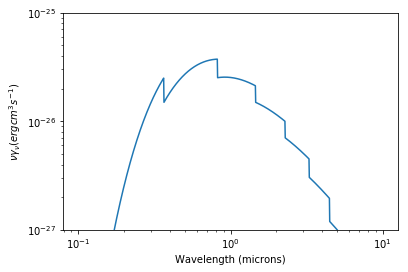

0.1 5.20565399512e-30
0.100462042135 5.52749634345e-30
0.100926219099 5.86741974025e-30
0.101392540756 6.22632784498e-30
0.101861017016 6.60516311431e-30
0.102331657833 7.00490813834e-30
0.102804473209 7.42658700739e-30
0.103279473192 7.87126670928e-30
0.103756667875 8.34005855725e-30
0.104236067398 8.83411964836e-30
0.104717681949 9.35465435229e-30
0.105201521762 9.90291583056e-30
0.105687597118 1.04802075858e-29
0.106175918348 1.1087885041e-29
0.106666495828 1.17273571486e-29
0.107159339982 1.24000880291e-29
0.107654461284 1.31075986381e-29
0.108151870255 1.38514684635e-29
0.108651577465 1.46333372495e-29
0.109153593533 1.545490675e-29
0.109657929127 1.63179425079e-29
0.110164594963 1.72242756626e-29
0.11067360181 1.81758047832e-29
0.111184960482 1.91744977269e-29
0.111698681847 2.02223935235e-29
0.112214776821 2.13216042829e-29
0.112733256371 2.24743171264e-29
0.113254131515 2.36827961411e-29
0.113777413322 2.49493843552e-29
0.114303112911 2.62765057343e-29
0.114831241454 2.76666671

0.330003479113 1.96334258373e-26
0.331528234232 1.98774968465e-26
0.333060034362 2.01226263388e-26
0.334598912055 2.03687876444e-26
0.336144900011 2.06159537383e-26
0.337698031083 2.08640972484e-26
0.339258338274 2.11131904622e-26
0.340825854742 2.13632053347e-26
0.342400613797 2.16141134954e-26
0.343982648902 2.18658862566e-26
0.345571993676 2.21184946205e-26
0.347168681893 2.23719092879e-26
0.348772747481 2.26261006653e-26
0.350384224529 2.2881038874e-26
0.35200314728 2.31366937575e-26
0.353629550136 2.33930348901e-26
0.355263467658 2.36500315857e-26
0.356904934568 2.39076529054e-26
0.358553985746 2.41658676671e-26
0.360210656236 2.44246444535e-26
0.361874981241 2.46839516208e-26
0.363546996129 2.49437573079e-26
0.365226736431 1.4948913356e-26
0.36691423784 1.51207446484e-26
0.368609536217 1.52931859867e-26
0.370312667587 1.54662191602e-26
0.372023668141 1.56398257607e-26
0.373742574239 1.5813987187e-26
0.375469422407 1.59886846495e-26
0.377204249342 1.6163899175e-26
0.378947091907 1

In [6]:
#reproducing the final plot

# Constants in CGS units: http://www.astro.wisc.edu/~dolan/constants.html, thanks Enia <3
R = 2.1798741e-11 # Rydber's constant [erg]
c = 2.99792458e10 # speed of light [cm s-1.]
e_charge = 4.8032068e-10 # electron charge [esu]
e_mass = 9.1093897e-28 # electron mass [g]
h = 6.6260755e-27 # planck's constant [erg s]
k = 1.380658e-16 #Boltzmann constant [erg K-1]
n = 10. 
l = 0
Z = 1.
T= 10000. #K

# a list of wavelength in micrometers
wavelength = np.logspace(-1, 1, 1000)

# a corresponding list of frequency in Hz
frequencies = (c / (wavelength * 10**-4))

y_bf=[]
for i in range(len(frequencies)):
    y_bf.append(frequencies[i]*summed_emission_coefficient(frequencies[i], Z, n, T))

plt.plot(wavelength, y_bf)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10e-28,10e-26)
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'$\nu\gamma_{\nu} (erg  cm^3  s^{-1})$')
plt.show()